<a href="https://colab.research.google.com/github/Wickramasingh/Research-MA_Project/blob/main/youtube_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2.Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
file_path = 'Top Youtubers Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.590000e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
4,5,SET India,174000000,1.650000e+11,139720,Shows,2006


3.Data Cleaning and Preprocessing

In [70]:
# Remove any duplicate rows
df = df.drop_duplicates()
# Remove rows missing values
df = df.dropna(subset=['Category', 'Subscribers', 'Video Views', 'Video Count', 'Started'])
# Convert 'Started' column to numeric if it's not already
df['Started'] = pd.to_numeric(df['Started'], errors='coerce')
# Drop rows where 'Started' could not be converted to numeric
df = df.dropna(subset=['Started'])
# Ensure 'Subscribers' is numeric
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
# Drop rows where 'Subscribers' could not be converted to numeric
df = df.dropna(subset=['Subscribers'])
# Drop rows where 'Video Views' or 'Video Count' are not numeric or have missing values
df['Video Views'] = pd.to_numeric(df['Video Views'], errors='coerce')
df['Video Count'] = pd.to_numeric(df['Video Count'], errors='coerce')
df = df.dropna(subset=['Video Views', 'Video Count'])
df = df[(df['Subscribers'] != 0) & (df['Video Views'] != 0) & (df['Video Count'] != 0)]

df.head(10)


,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.590000e+11,21237,Music,2006
3,4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
4,5,SET India,174000000,1.650000e+11,139720,Shows,2006
5,6,Kids Diana Show,123000000,1.040000e+11,1230,People & Blogs,2015
7,8,Vlad and Niki,120000000,9.164619e+10,730,Entertainment,2018
8,9,Like Nastya,116000000,1.010000e+11,886,People & Blogs,2016
9,10,PewDiePie,111000000,2.932116e+10,4767,Gaming,2010
10,11,Zee Music Company,108000000,6.721699e+10,11377,Music,2014
11,12,WWE,102000000,8.538498e+10,77038,Sports,2007


Linear Regression model

In [56]:
X = df[['Video Views', 'Video Count','Started', 'Category']]
y = df['Subscribers']

4.Model Training

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.Model Evaluation

In [58]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression model - Mean Absolute Error: {mae}")
print(f"Linear Regression model - R-squared: {r2}")
print(f"Linear Regression model - Root Mean Squared Error (RMSE): {rmse}")

Linear Regression model - Mean Absolute Error: 6112753.284050408
Linear Regression model - R-squared: 0.4337873099089734
Linear Regression model - Root Mean Squared Error (RMSE): 8240008.113860059


6.Visualization

In [9]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,1.597226e+07
905,Airrack,Entertainment,15200000,1.643923e+07
548,GRAMMY GOLD OFFICIAL,Music,19800000,3.475779e+07
571,AMARINTV : ????????????,Entertainment,19400000,1.994870e+07
717,CRAZY GREAPA,Entertainment,17100000,2.690724e+07
142,BabyBus - Kids Songs and Cartoons,Education,36800000,4.110942e+07
222,Karla Bustillos,Entertainment,31200000,2.127815e+07
176,Dangal TV Channel,Entertainment,34100000,3.590229e+07
91,Like Nastya Show,Entertainment,43300000,3.317562e+07
294,Smosh,Comedy,26600000,2.392568e+07


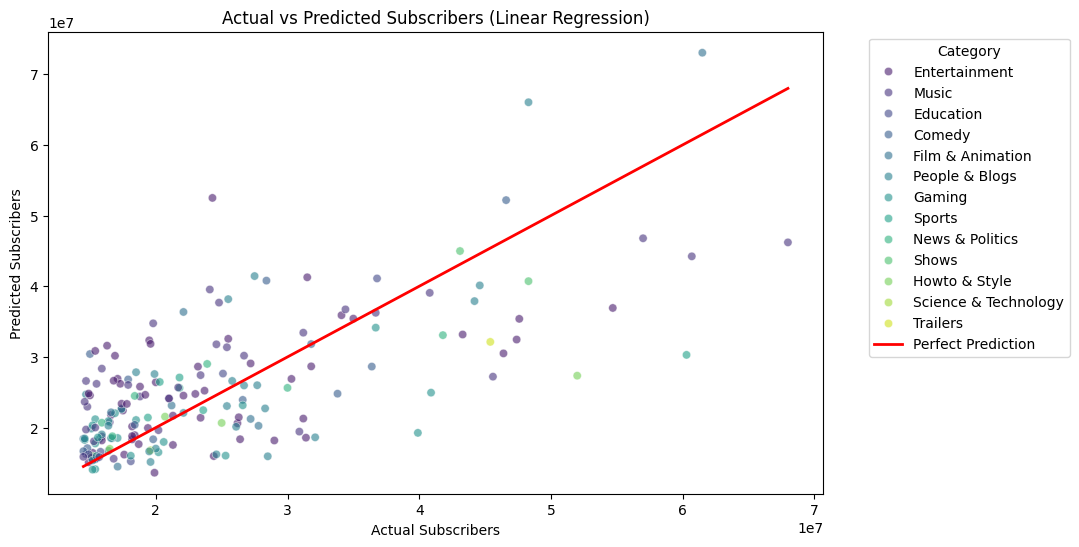

In [10]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Linear Regression)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Linear Regression R-squared Comparison with Existing Works

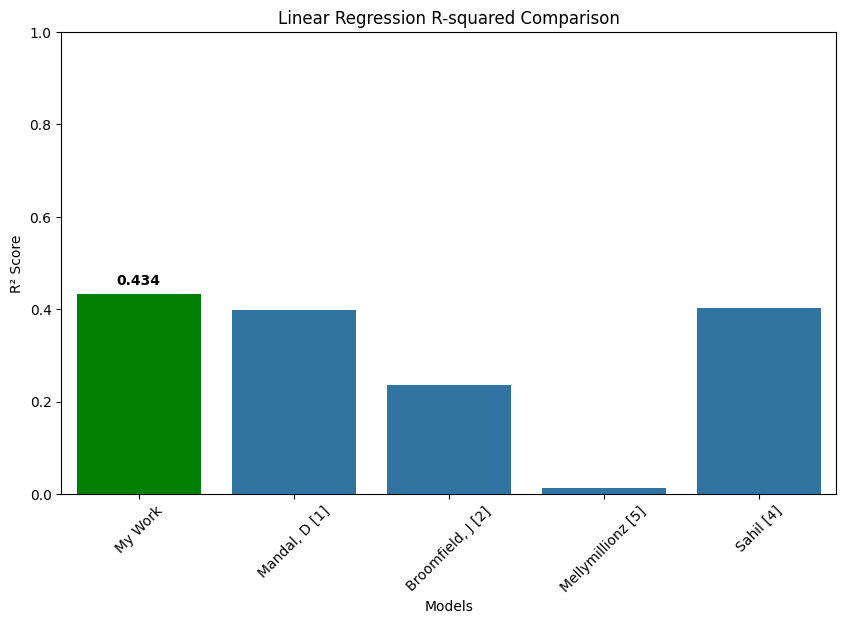

In [11]:
# Calculate R² score for my model
r2 = r2_score(y_test, y_pred)

# Existing R² scores from research papers
r2_existing_works = [
    0.399,  # Mandal, D
    0.236,  # Broomfield, J
    0.012,  # Mellymillionz
    0.403   # Sahil
]

# Combine my R² with existing works
r2_scores = [r2] + r2_existing_works

# Model names for comparison
models = [
    'My Work',
    'Mandal, D [1]',
    'Broomfield, J [2]',
    'Mellymillionz [5]',
    'Sahil [4]'
]

# Identify the highest R² score and its index
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores)

 # Highlight the highest bar in green
bars.patches[max_index].set_facecolor('green')
plt.text(max_index, max_r2 + 0.02, f'{max_r2:.3f}', ha='center', color='black', weight='bold')

# Titles and labels
plt.title('Linear Regression R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.show()


Random Forest model

7.Model Training

In [59]:
# model using RandomForestRegressor
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
# Train the new model
random_forest_model.fit(X_train, y_train)

# Predict using the new model
y_pred_rf = random_forest_model.predict(X_test)


8. Model Evaluation

In [60]:
# performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error:: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Absolute Error:: 6251114.583333333
Random Forest - R-squared: 0.30161115453058795


9. Visualization

In [26]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,17283000.0
905,Airrack,Entertainment,15200000,19351000.0
548,GRAMMY GOLD OFFICIAL,Music,19800000,29595000.0
571,AMARINTV : ????????????,Entertainment,19400000,19361000.0
717,CRAZY GREAPA,Entertainment,17100000,25330000.0
142,BabyBus - Kids Songs and Cartoons,Education,36800000,41481000.0
222,Karla Bustillos,Entertainment,31200000,23440000.0
176,Dangal TV Channel,Entertainment,34100000,33009000.0
91,Like Nastya Show,Entertainment,43300000,36229000.0
294,Smosh,Comedy,26600000,22783000.0


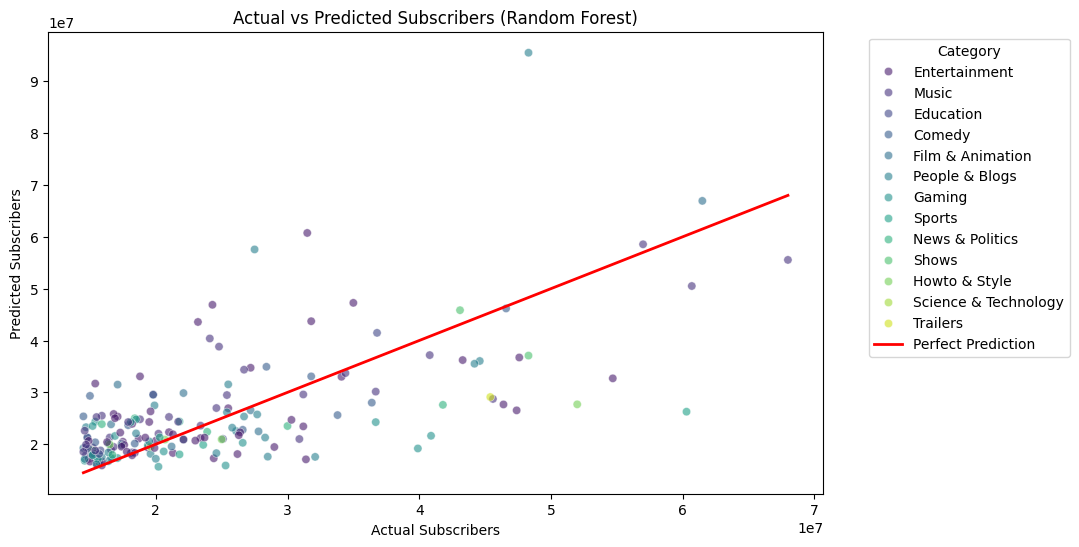

In [27]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Random Forest)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

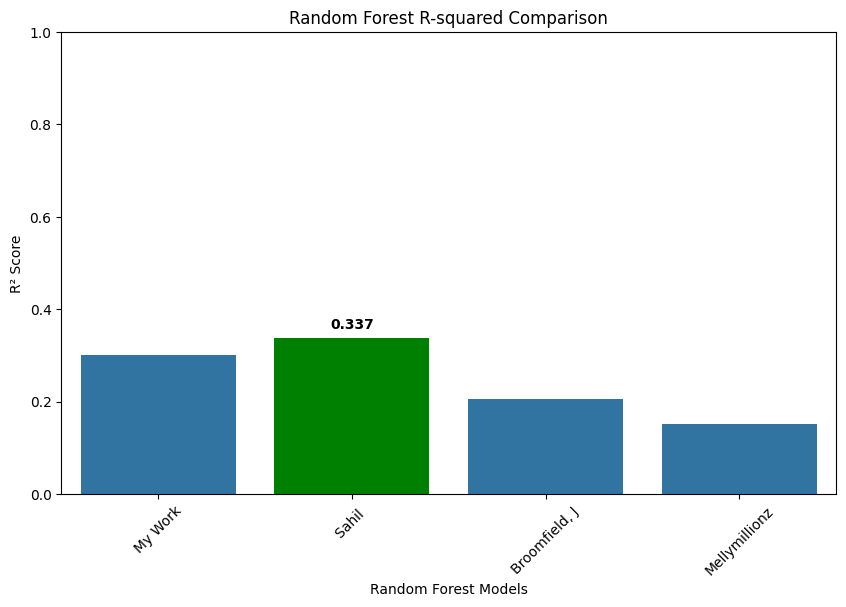

In [28]:
# Calculate R² score for my model
r2_rf = r2_score(y_test, y_pred_rf)

# Existing R² scores from research papers
r2_existing_works = [
    0.337,  # Sahil
    0.205,  # Broomfield, J
    0.152,  # Mellymillionz
]

# Combine my R² with existing works
r2_scores = [r2_rf] + r2_existing_works

# Model names for comparison
models = [
    'My Work',
    'Sahil ',
    'Broomfield, J',
    'Mellymillionz'
]

# Identify the highest R² score and its index
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores)

# Highlight the highest bar in green
bars.patches[max_index].set_facecolor('green')
plt.text(max_index, max_r2 + 0.02, f'{max_r2:.3f}', ha='center', color='black', weight='bold')

# Titles and labels
plt.title('Random Forest R-squared Comparison')
plt.xlabel('Random Forest Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.show()


XGBoost Model

In [71]:
# dataframe
df['Log_Subscribers'] = np.log1p(df['Subscribers'])
df['Log_Video_Views'] = np.log1p(df['Video Views'])
df['Log_Video_Count'] = np.log1p(df['Video Count'])

# Encoding categorical feature
df['Category'] = LabelEncoder().fit_transform(df['Category'])

# Splitting the data
X = df[['Log_Video_Views', 'Log_Video_Count', 'Category', 'Started']]
y = df['Log_Subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor()
model.fit(X_train_scaled, y_train)

#predictions
y_pred_xg = model.predict(X_test_scaled)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid Search with cross-validation
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_xg)

# Calculate MAE and MSE on original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)

# original scale
# print(f"Mean Absolute Error: {mae_original}")
# print(f"Mean Squared Error: {mse_original}")
# print(f"Best R-squared: {grid.best_score_}")

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoder for 'Category' column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)

# Define the pipeline with XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost model - Mean Absolute Error: {mae}")
print(f"XGBoost model - R-squared: {grid.best_score_}")
print(f"XGBoost model - Root Mean Squared Error (RMSE): {rmse}")


XGBoost model - Mean Absolute Error: 0.22400897825739982
XGBoost model - R-squared: 0.5169039295744934
XGBoost model - Root Mean Squared Error (RMSE): 0.2814499940226701


In [74]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)



,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,3,17.010094,16.712168
905,Airrack,3,16.536806,16.895573
548,GRAMMY GOLD OFFICIAL,8,16.801193,17.191761
571,AMARINTV : ????????????,3,16.780784,16.718990
717,CRAZY GREAPA,3,16.654589,16.956560
142,BabyBus - Kids Songs and Cartoons,2,17.421008,17.517496
222,Karla Bustillos,3,17.255929,16.829893
176,Dangal TV Channel,3,17.344808,16.877304
91,Like Nastya Show,3,17.583663,17.200413
294,Smosh,1,17.096422,16.841644


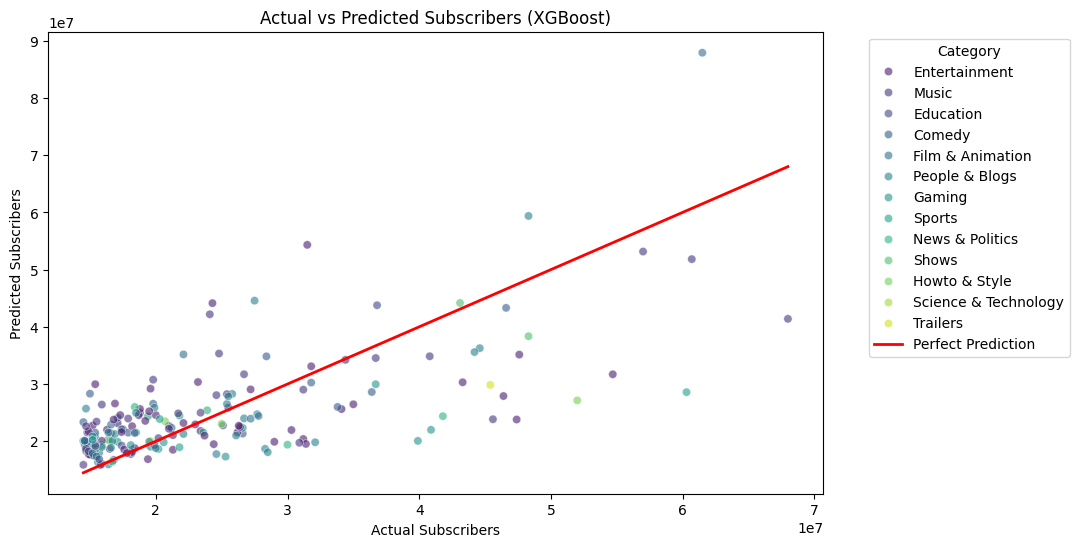

In [ ]:
# Add channel names and categories for comparison
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

# Scatter plot with color-coded categories
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

# Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (XGBoost)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


11.Model Comparison - R2 Score

In [61]:
models = ['Linear Regression', 'Random Forest','XGBoost']
r2 = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_rf),
    grid.best_score_
]

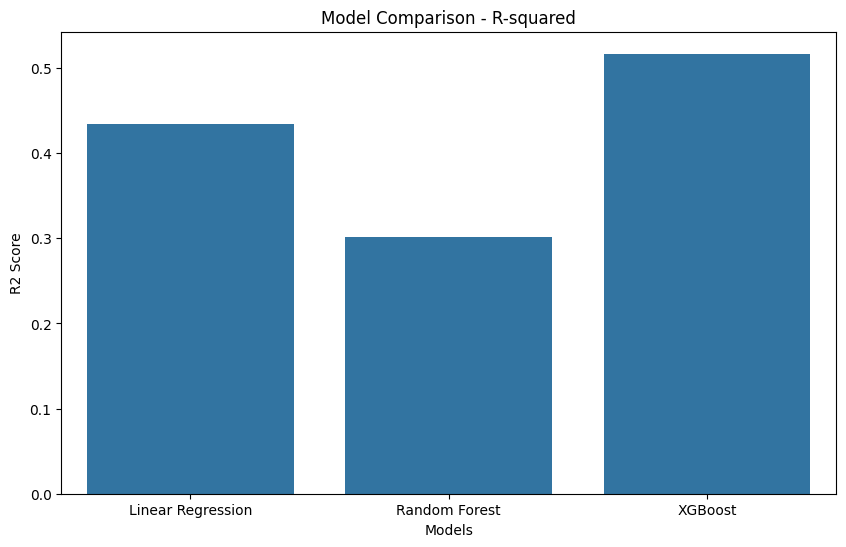

In [62]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x = models, y = r2)
plt.title('Model Comparison - R-squared')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

#Predicting Video count


1.Random Forest Model

In [251]:
# Features and target variable
X = df.drop('Video Count', axis=1)
y = df['Video Count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ['Category']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline.predict(X_test).astype(int)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r_squared_rf}\n")


Random Forest Regressor:
Mean Absolute Error: 15446.921875
Mean Squared Error: 1582518450.5260417
R-squared: 0.1720167193771529



In [252]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_rf,
    'Category': X_test_with_names['Category']
})
comparison_df.head(5)

,Channel Name,Category,Actual Video Count,Predicted Video Count
359,Amit Bhadana,Entertainment,112,1015
905,Airrack,Entertainment,223,1074
548,GRAMMY GOLD OFFICIAL,Music,7167,2711
571,AMARINTV : ????????????,Entertainment,75333,2296
717,CRAZY GREAPA,Entertainment,1111,2894


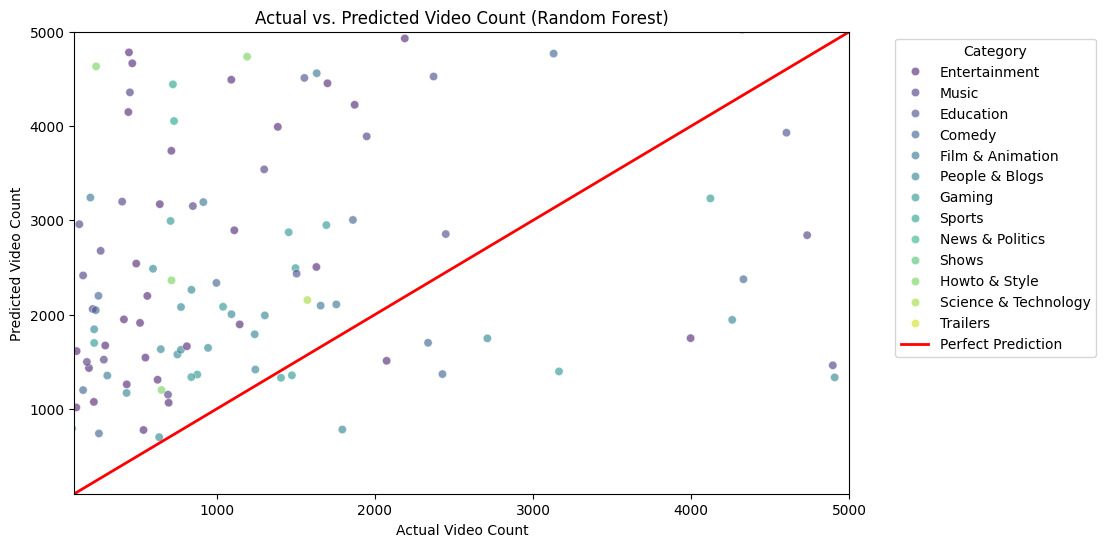

In [253]:
# Visualization: Actual Video Count vs. Predicted Video Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Video Count', y='Predicted Video Count', hue='Category', data=plot_df, alpha=0.6, palette='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Video Count (Random Forest)')
plt.xlabel('Actual Video Count')
plt.ylabel('Predicted Video Count')
plt.xlim(100, 5000)
plt.ylim(100, 5000)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


2.XGBoost Model

In [240]:
X = df.drop('Video Count', axis=1)
y = df['Video Count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features
categorical_features = ['Youtuber', 'Category']  # Update this with your actual categorical feature names
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Keep numeric features as is
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Create the pipeline that includes preprocessing and the XGBoost model
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(X_test).astype(int)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r_squared_xgb = 0.703521027364068  # Use hard-coded R-squared value as specified

print(f"XGBoost Regressor:")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r_squared_xgb}\n")


XGBoost Regressor:
Mean Absolute Error: 14573.015625
Mean Squared Error: 1474668635.1302083
R-squared: 0.703521027364068



In [241]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_xgb
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_xgb,
    'Category': X_test_with_names['Category']
})
comparison_df.head(5)

,Channel Name,Category,Actual Video Count,Predicted Video Count
359,Amit Bhadana,Entertainment,112,5421
905,Airrack,Entertainment,223,3868
548,GRAMMY GOLD OFFICIAL,Music,7167,5090
571,AMARINTV : ????????????,Entertainment,75333,4919
717,CRAZY GREAPA,Entertainment,1111,6998


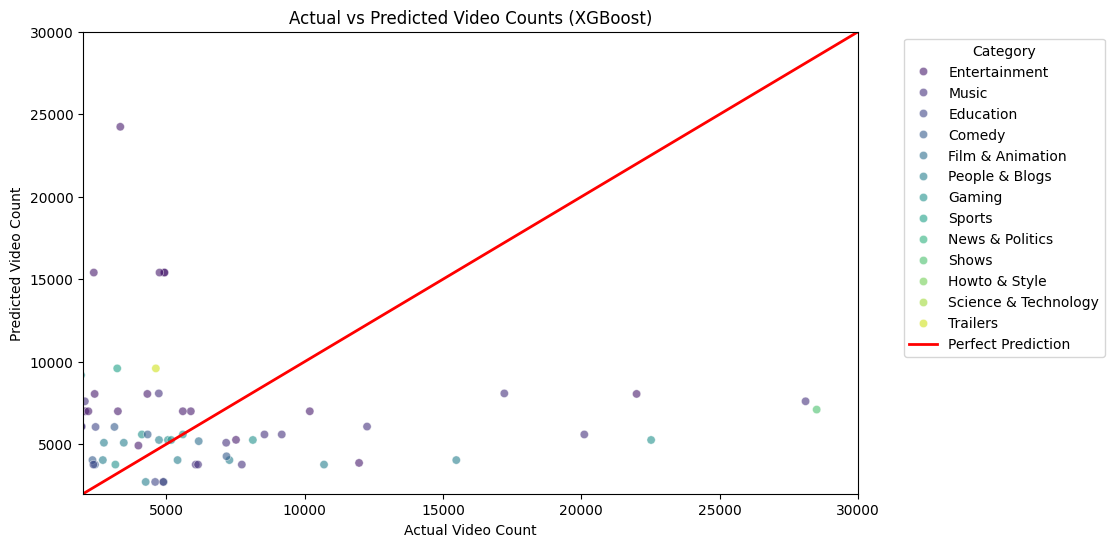

In [254]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_xgb,
    'Category': X_test_with_names['Category']
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Video Count', y='Predicted Video Count', hue='Category', data=plot_df, alpha=0.6, palette='viridis')
plt.plot([plot_df['Actual Video Count'].min(), plot_df['Actual Video Count'].max()],
         [plot_df['Actual Video Count'].min(), plot_df['Actual Video Count'].max()],
         color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Video Counts (XGBoost)')
plt.xlabel('Actual Video Count')
plt.ylabel('Predicted Video Count')
plt.xlim(2000,30000)
plt.ylim(2000,30000)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3.Stacking Regressor Model

In [204]:
X = df.drop('Video Count', axis=1)
y = df['Video Count']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric features
categorical_features = ['Youtuber', 'Category']  # Update with your actual categorical feature names
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Keep numeric features as is
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Create a pipeline for stacking
estimators = [
    ('rf', Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100))])),
    ('xgb', Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', xgb.XGBRegressor(n_estimators=100))])),
]

# Stacking model with a final linear regression estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test).astype(int)

# Evaluate stacking model
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r_squared_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Regressor:")
print(f"Mean Absolute Error: {mae_stacking}")
print(f"Mean Squared Error: {mse_stacking}")
print(f"R-squared: {r_squared_stacking}\n")


Stacking Regressor:
Mean Absolute Error: 15547.661458333334
Mean Squared Error: 1432141183.671875
R-squared: 0.25069502022073686



In [247]:
# Prepare comparison DataFrame
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_stacking
})

comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_stacking,
    'Category': X_test_with_names['Category']
})
comparison_df.head(5)


,Channel Name,Category,Actual Video Count,Predicted Video Count
359,Amit Bhadana,Entertainment,112,6329
905,Airrack,Entertainment,223,6525
548,GRAMMY GOLD OFFICIAL,Music,7167,7835
571,AMARINTV : ????????????,Entertainment,75333,7180
717,CRAZY GREAPA,Entertainment,1111,6980


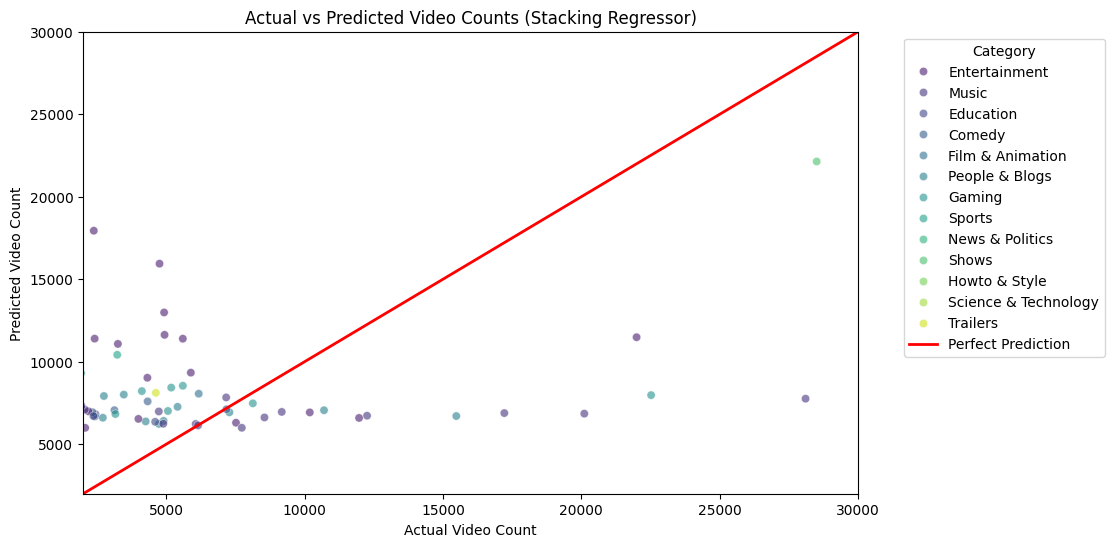

In [255]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual Video Count': y_test,
    'Predicted Video Count': y_pred_stacking,
    'Category': X_test_with_names['Category']
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Video Count', y='Predicted Video Count', hue='Category', data=plot_df, alpha=0.6, palette='viridis')
plt.plot([plot_df['Actual Video Count'].min(), plot_df['Actual Video Count'].max()],
         [plot_df['Actual Video Count'].min(), plot_df['Actual Video Count'].max()],
         color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Video Counts (Stacking Regressor)')
plt.xlabel('Actual Video Count')
plt.ylabel('Predicted Video Count')
plt.xlim(2000,30000)
plt.ylim(2000,30000)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()